INTRODUCTION

Cardiovascular disease (CVD) is a general term for conditions affecting the heart or blood vessels. It's usually associated with a build-up of fatty deposits inside the arteries (atherosclerosis) and an increased risk of blood clots.

TYPES OF CARDIOVASCULAR DISEASE

There are many different types of cardiovascular diceases for of them explained below.

1. Coronary heart disease
Coronary heart disease occurs when the flow of oxygen-rich blood to the heart muscle is blocked or reduced.

2. Strokes and TIAs
A stroke is where the blood supply to part of the brain is cut off, which can cause brain damage and possibly death.

3. Peripheral arterial disease
Peripheral arterial disease occurs when there's a blockage in the arteries to the limbs, usually the legs.

4. Aortic disease
Aortic diseases are a group of conditions affecting the aorta. This is the largest blood vessel in the body, which carries blood from the heart to the rest of the body.

IMPORTANCE FOR CARDIOVASCULAR PREDICTION
  
  
1. Enables healthcare providers allocate resources more efficiently through identifying individuals at higher risk enabling them focus on targeted interventions and screenings for better resource utilization.

2. Allow Early detection of individuals at risk of developing cardiovascular disease before symptoms appear allowing intervention and preventive measures, thus aiding reducing the impact and severity of the disease.  

3. Predicting and preventing these diseases can lead to cost savings for both individuals and healthcare systems since Cardiovascular diseases are associated with high healthcare costs and long-term care. 

DATASET DATA ABBREVIATIONS 

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

1. IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler
import joblib

2. LOADING DATASET

In [2]:
csv_d = pd.read_csv('health_data.csv')
csv_d.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


In [3]:
# we rename the columns
csv_df = csv_d.rename(columns = {'ap_hi': 'Systolic blood pressure', 'ap_lo': 'Diastolic blood pressure', 'pres': 'bloodpressure', 'gluc':'glucose','smoke':'smoking', 'alco':'alcoholic','active':'Physical activity', 'cardio':'result'}, inplace = False)

In [4]:
csv_df.head()

,Unnamed: 0,id,age,gender,height,weight,Systolic blood pressure,Diastolic blood pressure,cholesterol,glucose,smoking,alcoholic,Physical activity,result
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


2. DATA PREPARATION AND CLEANING.

In [5]:
#Droping unwanted columns.
csv_df = csv_df.drop(columns=['Unnamed: 0', 'id'])

In [6]:
#dividing age which is in days by 365.25 to get the actual number of years
csv_df['age'] = csv_df['age'] / 365.25 

In [7]:
csv_df.head()

,age,gender,height,weight,Systolic blood pressure,Diastolic blood pressure,cholesterol,glucose,smoking,alcoholic,Physical activity,result
0,50.357290,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,55.381246,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,51.627652,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,48.249144,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,47.841205,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


In [8]:
csv_df.tail()

,age,gender,height,weight,Systolic blood pressure,Diastolic blood pressure,cholesterol,glucose,smoking,alcoholic,Physical activity,result
69995,52.676249,1,168.0,76.0,120.0,80.0,0,0,1,0,1,0
69996,61.878166,0,158.0,126.0,140.0,90.0,1,1,0,0,1,1
69997,52.199863,1,183.0,105.0,180.0,90.0,2,0,0,1,0,1
69998,61.412731,0,163.0,72.0,135.0,80.0,0,1,0,0,0,1
69999,56.235455,0,170.0,72.0,120.0,80.0,1,0,0,0,1,0


ON THE DATASET ABOVE, THE COLUMN SMOKING IS ENCODED WHERE 1 REPRESENTS SMOKING AND 0 REPRESENTS NONSMOKING, THE COLUMN ALCOHOLIC ALSO ENCODED 1 REPRESENTING ALCOHOLIC WHILE 0 REPRESENTS NON ALCOHOLIC AND THE COLUMN PHYSICAL ACTIVITY ENCODED 1 REPRESENTING ACTIVE AND 0 REPRESENTING NON ACTIVE AND LASTLY THE COLUMN GENDER WHERE 1 REPRESENTING MALE AND 0 REPRESENTING FEMALE.

In [9]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       70000 non-null  float64
 1   gender                    70000 non-null  int64  
 2   height                    70000 non-null  float64
 3   weight                    70000 non-null  float64
 4   Systolic blood pressure   70000 non-null  float64
 5   Diastolic blood pressure  70000 non-null  float64
 6   cholesterol               70000 non-null  int64  
 7   glucose                   70000 non-null  int64  
 8   smoking                   70000 non-null  int64  
 9   alcoholic                 70000 non-null  int64  
 10  Physical activity         70000 non-null  int64  
 11  result                    70000 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 6.4 MB


In [10]:
csv_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.302850,6.754967,29.563313,48.361396,53.943874,58.390144,64.922656
gender,70000.0,0.349571,0.476838,0.000000,0.000000,0.000000,1.000000,1.000000
height,70000.0,164.359229,8.210126,55.000000,159.000000,165.000000,170.000000,250.000000
weight,70000.0,74.205690,14.395757,10.000000,65.000000,72.000000,82.000000,200.000000
Systolic blood pressure,70000.0,128.817286,154.011419,-150.000000,120.000000,120.000000,140.000000,16020.000000
Diastolic blood pressure,70000.0,96.630414,188.472530,-70.000000,80.000000,80.000000,90.000000,11000.000000
cholesterol,70000.0,0.366871,0.680250,0.000000,0.000000,0.000000,1.000000,2.000000
glucose,70000.0,0.226457,0.572270,0.000000,0.000000,0.000000,0.000000,2.000000
smoking,70000.0,0.088129,0.283484,0.000000,0.000000,0.000000,0.000000,1.000000
alcoholic,70000.0,0.053771,0.225568,0.000000,0.000000,0.000000,0.000000,1.000000


In [11]:
# Checking for null values.
csv_df.isnull().sum()

age                         0
gender                      0
height                      0
weight                      0
Systolic blood pressure     0
Diastolic blood pressure    0
cholesterol                 0
glucose                     0
smoking                     0
alcoholic                   0
Physical activity           0
result                      0
dtype: int64

In [12]:
csv_df.isnull().all()

age                         False
gender                      False
height                      False
weight                      False
Systolic blood pressure     False
Diastolic blood pressure    False
cholesterol                 False
glucose                     False
smoking                     False
alcoholic                   False
Physical activity           False
result                      False
dtype: bool

In [13]:
# datatypes for each colum within the dataset.
csv_df.dtypes

age                         float64
gender                        int64
height                      float64
weight                      float64
Systolic blood pressure     float64
Diastolic blood pressure    float64
cholesterol                   int64
glucose                       int64
smoking                       int64
alcoholic                     int64
Physical activity             int64
result                        int64
dtype: object

In [14]:
csv_df.shape

(70000, 12)

In [15]:
csv_df.value_counts()

age        gender  height  weight  Systolic blood pressure  Diastolic blood pressure  cholesterol  glucose  smoking  alcoholic  Physical activity  result
60.443532  0       175.0   69.0    120.0                    80.0                      0            0        0        0          1                  1         2
46.009582  0       157.0   67.0    120.0                    80.0                      0            0        0        0          1                  0         2
56.169747  0       164.0   66.0    120.0                    80.0                      0            0        0        0          0                  0         2
57.820671  0       160.0   60.0    120.0                    80.0                      0            0        0        0          0                  1         2
47.893224  1       169.0   74.0    120.0                    80.0                      0            0        0        0          1                  1         2
                                                   

3. EXPLORATORY DATA ANALYSIS.

On glucose and cholesterol columns, a value of zero does not make sense and thus indicates missing value or rather invalid zero(0) value. 

In [16]:
# Handling the missing(o) values
col=['glucose' ,'cholesterol']

In [17]:
for i in col:
    csv_df[i].replace(0, csv_df[i].mean(),inplace=True)

csv_df.to_csv("clean_health_data.csv",index=False)

4. Feature Engineering

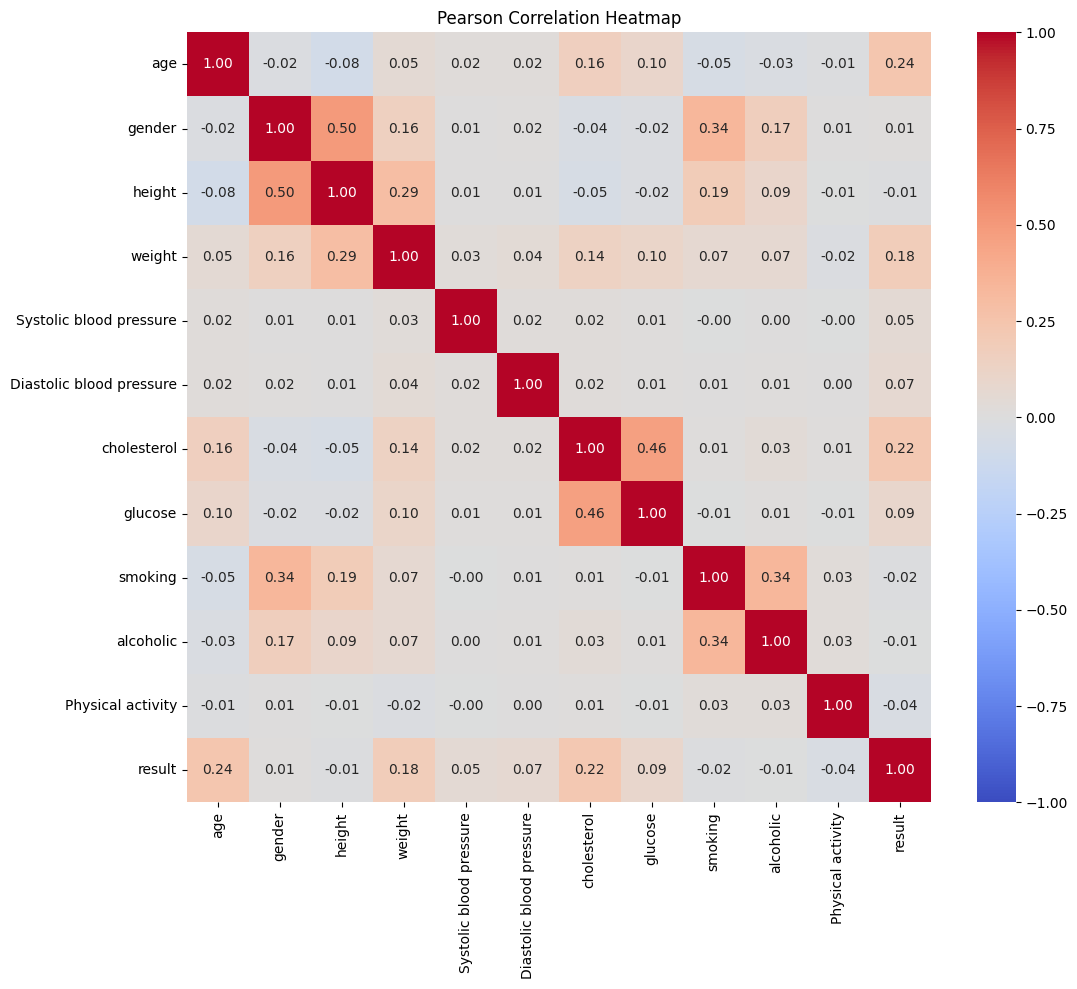

In [18]:
# Let's see correlation map of potential threats for developing cardio diseases
numeric_columns = csv_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Pearson Correlation Heatmap")
plt.show()

In [19]:
#Correlation with output variable
correlation_matrix_target = abs(correlation_matrix["result"])
correlation_matrix_target

age                         0.238159
gender                      0.008109
height                      0.010821
weight                      0.181660
Systolic blood pressure     0.054475
Diastolic blood pressure    0.065719
cholesterol                 0.219866
glucose                     0.088056
smoking                     0.015486
alcoholic                   0.007330
Physical activity           0.035653
result                      1.000000
Name: result, dtype: float64

In [20]:
#Selecting highly correlated features
relevant_features = correlation_matrix_target[correlation_matrix_target>0.1]
relevant_features

age            0.238159
weight         0.181660
cholesterol    0.219866
result         1.000000
Name: result, dtype: float64

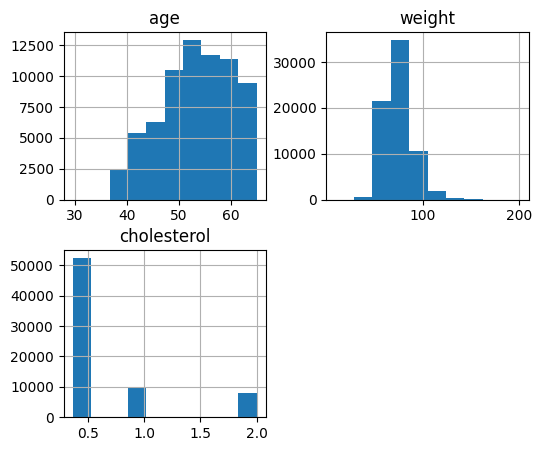

In [21]:
# plotting histograms for the three higly correlated columns with cardiovascular disease in the dataset.

csv_df.hist(column=['age','weight','cholesterol'], figsize=(6,5))
plt.show()

NOTE:  
  
From the correlation heatmap,there are no strong correlations for developing cardio deseases though through looking closely to potential threats, age, weight and cholesterol are to some extent worth a closer look with an even stronger relationship between high cholesterol and age.

INVESTIGATING POTENTIAL RISK GROUPS

In [22]:
# closer comparison on mean values for those having cardio vascular diseases and with that of those not having and tranmsform result.

csv_df_result_0 = csv_df[csv_df['result'] == 0]
csv_df_result_1 = csv_df[csv_df['result'] == 1]

mean_result_0 = csv_df_result_0.mean()
mean_result_1 = csv_df_result_1.mean()
comparison_csv_df = pd.concat([mean_result_0, mean_result_1], axis=1)
comparison_csv_df.columns = ['result_0', 'result_1']
print(comparison_csv_df)

                            result_0    result_1
age                        51.695068   54.912561
gender                      0.345707    0.353441
height                    164.448017  164.270334
weight                     71.592150   76.822368
Systolic blood pressure   120.432598  137.212042
Diastolic blood pressure   84.251763  109.023929
cholesterol                 0.523781    0.759205
glucose                     0.375151    0.462657
smoking                     0.092516    0.083736
alcoholic                   0.055424    0.052117
Physical activity           0.817881    0.789559
result                      0.000000    1.000000


c:\Users\walkerb\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


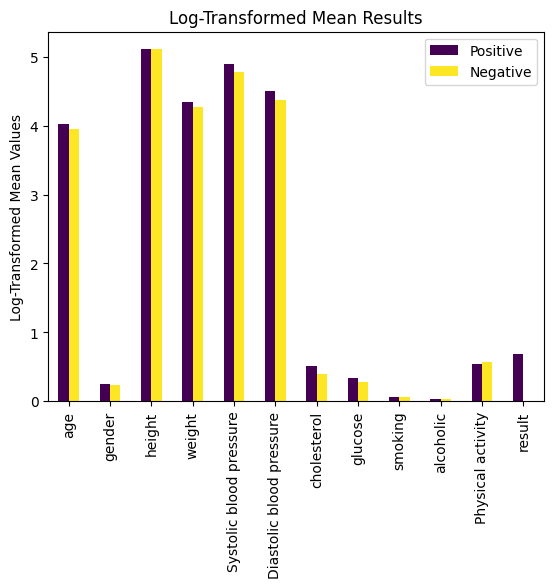

In [23]:
# Visualizing comparison on mean value logs.

csv_df_result_1_log = np.log1p(csv_df_result_1)
csv_df_result_0_log = np.log1p(csv_df_result_0)

mean_csv_df_result_1 = csv_df_result_1_log.mean()
mean_csv_df_result_0 = csv_df_result_0_log.mean()

mean_csv_df_combined = pd.DataFrame({'Positive': mean_csv_df_result_1, 'Negative': mean_csv_df_result_0})
mean_csv_df_combined.plot(kind='bar', colormap='viridis')

plt.title('Log-Transformed Mean Results')
plt.ylabel('Log-Transformed Mean Values')
plt.show()

Among potential risks could be:

1. Age
2. Weight  
3. High blood pressure;  
4. High cholesterol;  
5. High glucose;  

Less active lifestyle, gender and more bad habits (smoking, drinking alcohol).

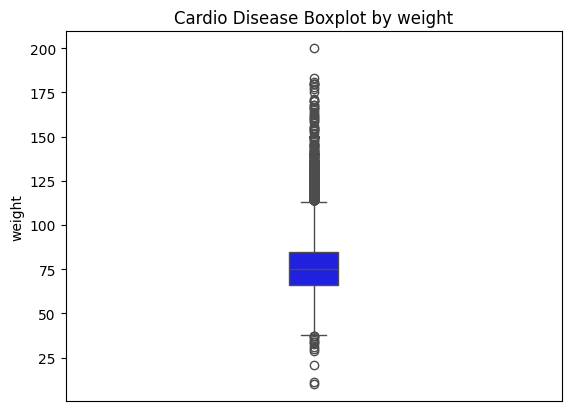

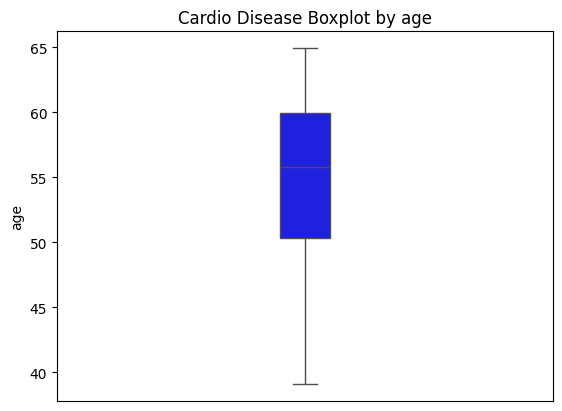

In [24]:
csv_df_result_1 = csv_df[csv_df['result'] == 1]



sns.boxplot(y='weight', data=csv_df_result_1, color='blue', width=(0.1))
plt.title('Cardio Disease Boxplot by weight')
plt.xticks([])
plt.ylabel('weight')
plt.show()

sns.boxplot(y='age', data=csv_df_result_1, color='blue', width=(0.1))
plt.title('Cardio Disease Boxplot by age')
plt.xticks([])
plt.ylabel('age')
plt.show()

From the above boxplot the age group between 50-60 years is at higher risk of cardiovascular disease.

5. CARDIOVASCULAR DISEASE PREDICTION MODEL

In [25]:
# import some data***
x = csv_df.drop(columns = 'result', axis=1)

y = csv_df['result']

# Split the data into a training set and a test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 3 )

# stratify will distribute 0 and 1 in even manner, of that prediction will be unbiased
# test_split tells a ratio about size of test data in dataset, means 15 percent of data is test data
# random_state tells about the randomness of data, and number tells about its extent of randomness

In [26]:
# checking shape of splitted data

print(x.shape, x_train.shape, x_test.shape)

(70000, 11) (59500, 11) (10500, 11)


MULTIPLE MODEL TRAINING

In [27]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0) # A higher gamma value means that each training example will have a greater influence on the decision boundary.
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1') # liblinear is parameter specifies the solver to use,
# L1 penalty is a type of regularization that helps to prevent overfitting.

rfc = RandomForestClassifier(n_estimators= 50, random_state = 2)  # n_estimators : the number of trees in the forest,
# random_state : specifies the random seed that is used to initialize the random forest

abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)

In [28]:
classification = {
    'Support Vector Classifier' : svc,
    'K-Neighbors Classifier'  : knc,
    'Multinomial NB'  : mnb,
    'Decision Tree Classifier'  : dtc,
    'Logistic Regression'  : lrc,
    'Random Forest Classifier'  : rfc,
    'AdaBoost Classifier': abc,
    'Bagging Classifier' : bc,
    'Extra Trees Classifier' : etc,
    'Gradient Boosting Classifier' : gbdt,
    'XGB Classifier' : xgb
}

In [29]:
def train_classifier(classification, x_train, y_train, x_test, y_test):
  classification.fit(x_train, y_train)
  y_pred = classification.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  matrix = confusion_matrix(y_test, y_pred)

  return accuracy, precision, matrix

In [30]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
accuracy_scores = []
precision_scores = []

for name, cls in classification.items():
  curr_accuracy, curr_precision, matrix = train_classifier(cls, x_train, y_train, x_test, y_test)
  print("Model name : ", name)
  print("Accuracy : ", curr_accuracy)
  print("Precision : ", curr_precision)
  print("Confusin-Matrix : ", matrix, '\n')

  accuracy_scores.append(curr_accuracy)
  precision_scores.append(curr_precision)

Model name :  Support Vector Classifier
Accuracy :  0.4401904761904762
Precision :  0.43966341556703004
Confusin-Matrix :  [[2323 2930]
 [2948 2299]] 

Model name :  K-Neighbors Classifier
Accuracy :  0.6013333333333334
Precision :  0.5999623139250048
Confusin-Matrix :  [[3130 2123]
 [2063 3184]] 

Model name :  Multinomial NB
Accuracy :  0.5914285714285714
Precision :  0.6605166051660517
Confusin-Matrix :  [[4241 1012]
 [3278 1969]] 

Model name :  Decision Tree Classifier
Accuracy :  0.7346666666666667
Precision :  0.762422691405417
Confusin-Matrix :  [[4139 1114]
 [1672 3575]] 

Model name :  Logistic Regression
Accuracy :  0.716
Precision :  0.7317372621240025
Confusin-Matrix :  [[3942 1311]
 [1671 3576]] 

Model name :  Random Forest Classifier
Accuracy :  0.7175238095238096
Precision :  0.7232335094930514
Confusin-Matrix :  [[3839 1414]
 [1552 3695]] 

Model name :  AdaBoost Classifier
Accuracy :  0.7298095238095238
Precision :  0.7631004366812227
Confusin-Matrix :  [[4168 1085]


In [32]:
result_dataframe = pd.DataFrame({'Algorithm': classification.keys(), 'Accuracy': accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending = False)

In [33]:
result_dataframe

,Algorithm,Accuracy,Precision
6,AdaBoost Classifier,0.729810,0.763100
3,Decision Tree Classifier,0.734667,0.762423
10,XGB Classifier,0.735810,0.753329
9,Gradient Boosting Classifier,0.735048,0.750559
4,Logistic Regression,0.716000,0.731737
5,Random Forest Classifier,0.717524,0.723234
7,Bagging Classifier,0.714000,0.721389
8,Extra Trees Classifier,0.704762,0.707841
2,Multinomial NB,0.591429,0.660517
1,K-Neighbors Classifier,0.601333,0.599962


IMPROVEMENT OF MODEL

1. voting classifier ensemble a learning method that combines the predictions of several different machine learning models to produce a final prediction.
2. The models that are combined can be of different types, such as decision trees, support vector machines, or random forests.

In [34]:
rfc = RandomForestClassifier(n_estimators= 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)

In [35]:
voting = VotingClassifier(estimators=[('rfc', rfc), ('bc', bc), ('et', etc), ('xgb', xgb)],voting='soft')

In [36]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('bc',
                              BaggingClassifier(n_estimators=50,
                                                random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=No...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...))],
                 voting='soft')

In [37]:
y_pred = voting.predict( x_test)

print(accuracy_score( y_test, y_pred))
print(confusion_matrix( y_test, y_pred))
print(precision_score( y_test, y_pred))

0.7275238095238096
[[3897 1356]
 [1505 3742]]
0.7340133385641427


The voting model is the most accurate and precise model compared to all other models.

Model Evaluation

- Accuracy score
  1. For training data
  2. For testing data

  accuracy score for both should be closer to 1

 Other Metrices:
  1. Accuracy
  2. Precision
  3. Recall
  4. F1 Score

- Confusion Metrix

In [38]:
# accuracy function measures accuracy between two values,or columns

X_train_prediction = voting.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

print("The accuracy of training data : ", training_data_accuracy)

The accuracy of training data :  0.9997983193277311


In [39]:
# Accuracy, F1, Recall, Precision

Y_pred = voting.predict(x_test)


accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, Y_pred)
print("Precision  :", precision)
recall = recall_score(y_test, Y_pred)
print("Recall     :", recall)
F1_score = f1_score(y_test, Y_pred)
print("F1-score   :", F1_score)

Accuracy   : 0.7275238095238096
Precision  : 0.7340133385641427
Recall     : 0.7131694301505622
F1-score   : 0.7234412759787336


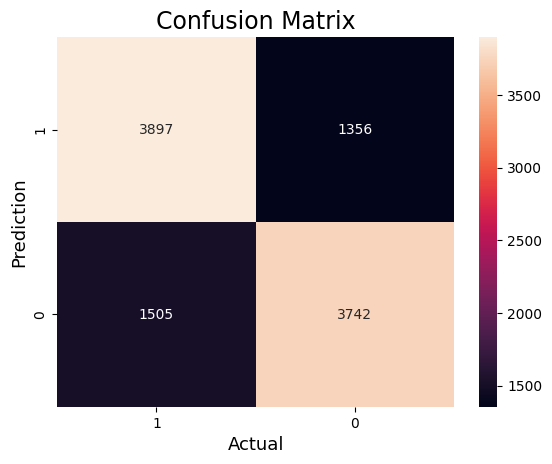

In [40]:
# confusion matrix

cm = confusion_matrix(y_test,Y_pred)

#Confusion matrix Plot.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['1', '0'],
            yticklabels=['1', '0'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve

Y_pred_prob = voting.predict_proba(x_test)[:, 1]
print(f'Area Under the Curve Score: {roc_auc_score(y_test, Y_pred_prob)}')

Area Under the Curve Score: 0.7862884925749274


The AUC score being rather high, the model can be assumed to be making reliable predictions.

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_prob)

df_roc = pd.DataFrame([fpr, tpr]).T
df_roc.columns = ['False Positive Ratio', 'True Positive Ratio']

import plotly.express as px

fig = px.line(df_roc, x = 'False Positive Ratio', y = 'True Positive Ratio')
fig.update_layout(title = dict(text = "ROC Curve.", y = 0.95, x = 0.5, 
                               xanchor = 'center', yanchor = 'top', font = dict(size = 20)))

TESTING THE PREDICTION C.S.D MODEL


Steps :

1. take input data
2. Process the data, change into array
3. reshape data as single element in array
4. predict output using predict function
5. output the value

In [43]:
# input feature values for: age, gender, height, weight, Systolic blood pressure, Diastolic blood pressure, cholesterol, glucose, smoking, alcoholic, Physical activity.


input_data = (30,0,160.0,50.0,100.0,80.0,0,0,0,0,1)

# changing data to numpy array
input_data_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped =  input_data_array.reshape(1,-1)

# standarize the input data
# std_data = scaler.transform(input_data_reshaped)
# print(std_data[0])

In [44]:
# predicting the result and printing it

prediction = voting.predict(input_data_reshaped)

print(prediction)

if(prediction[0] == 0):
    print("CVD NEGATIVE PREDICTION")

else:
    print("CVD POSITIVE PREDICTION \n Kindly seek further medical attention")

[1]
CVD POSITIVE PREDICTION 
 Kindly seek further medical attention


Notations
[0] : means Cardiovascular disease negative prediction.
[1] : means Cardiovascular disease positive prediction.

SAVING THE PREDICTION MODEL

In [45]:
import pickle
# importing the pickle library

filename = "trained_model.pkl"
pickle.dump(voting, open(filename, 'wb'))
# saving the model file

In [46]:
# loading the saved model

loaded_model = pickle.load(open("trained_model.pkl",'rb'))

In [47]:
# save the model to disk

filename = 'heart_model.sav'
joblib.dump(voting, filename)

['heart_model.sav']